# Project: Investigate a Dataset - [No-show appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

The dataset collects information from more than 100,000 medical appointments in Brazil with 14 associated variables: 
- Patient ID
- Appointment ID
- Gender
- Scheduled Day (This is the day the patient scheduled an appointment)
- Appointment Day (This is the day of the actual appointment)
- Age 
- Neighbourhood
- Scholarship - inidicates if a patient has been enrolled in the Brazilian welfare program [Bolsa Família](https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia)
- Hypertension 
- Diabetes
- Alcoholism
- Handicap - Number of handicaps
- SMS_received 
- No_show: Yes means the patient didn't show up while No means the patient showed up. 

### Question(s) for Analysis
- Between patients who are enrolled in a welfare programs and those who are not, who is more likely to show up for an appointment
- Which gender is more likely to show up for their appointment
- Which day of the week are people likely not to show up for their appointment
- Do patients with an underlying ailment like hypertension or diabetes more likely to show up for their scheduled appointment?
- Do patients with handicaps more likely to show up?
- Did sending out an SMS have an effect on whether a patient would show up or not?

<a id='wrangling'></a>
## Data Wrangling

### General Properties


First let us load in the data and see how many rows and columns are there. Since we are here we can also check the data types of the columns.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
row,col = df.shape
print("There are {} rows and {} columns".format(row,col))

There are 110527 rows and 14 columns


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


There are no missing data and most of the columns are in the correct data type aside from the ScheduledDay and AppointmentDay. There are some typos in the column names like *Hipertension* and *Handcap* and while most of the columns are in CamelCase, we have columns in snake_case like *SMS_received* and *No-show*


### Data Cleaning

We will check if there are any duplicate rows in the dataset

In [3]:
print("There are {} duplicated rows ".format(sum(df.duplicated())))

There are 0 duplicated rows 


Good. There are no duplicate rows, so the data is pretty clean as it is so far. We can go ahead and drop the columns we won't be using like PatientID, AppointmentID, ScheduledDay and SMS_received. Since we are dropping the columns we can go ahead and rename the columns with typo and convert some of the columns to the correct data type

In [4]:
df.drop(['PatientId','AppointmentID','ScheduledDay'], axis=1, inplace=True)
df.rename(columns={'Handcap':'Handicap','Hipertension':'Hypertension','No-show':'NoShow'},inplace=True)
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   Gender          110527 non-null  object             
 1   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 2   Age             110527 non-null  int64              
 3   Neighbourhood   110527 non-null  object             
 4   Scholarship     110527 non-null  int64              
 5   Hypertension    110527 non-null  int64              
 6   Diabetes        110527 non-null  int64              
 7   Alcoholism      110527 non-null  int64              
 8   Handicap        110527 non-null  int64              
 9   SMS_received    110527 non-null  int64              
 10  NoShow          110527 non-null  object             
dtypes: datetime64[ns, UTC](1), int64(7), object(3)
memory usage: 9.3+ MB


In [5]:
df.describe()

,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [6]:
df.query('Age == 115 or Age < 0')

,Gender,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,NoShow
63912,F,2016-05-19 00:00:00+00:00,115,ANDORINHAS,0,0,0,0,1,0,Yes
63915,F,2016-05-19 00:00:00+00:00,115,ANDORINHAS,0,0,0,0,1,0,Yes
68127,F,2016-05-16 00:00:00+00:00,115,ANDORINHAS,0,0,0,0,1,0,Yes
76284,F,2016-05-30 00:00:00+00:00,115,ANDORINHAS,0,0,0,0,1,0,No
97666,F,2016-06-03 00:00:00+00:00,115,SÃO JOSÉ,0,1,0,0,0,1,No
99832,F,2016-06-06 00:00:00+00:00,-1,ROMÃO,0,0,0,0,0,0,No


Looking at the age column, we see the minimum age is -1 and the maximum age is 115. It might be possible that someone might have lived for that long but having 5 patients with the same age as the maximum age is way too rare. We can safely drop the rows with ages 115 and -1.

In [7]:
df.drop(df.query('Age < 0 or Age == 115').index, axis=0, inplace=True)
df.query('Age == 115 or Age < 0')

,Gender,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,NoShow


The dataset looks clean so far, so we can go ahead and save a copy of it.

In [8]:
clean_data = df.copy()
clean_data.to_csv('clean_appointment_data.csv', index=False)

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 : Between patients who are enrolled in a welfare program and those who are not, who is more likely to show up for an appointment?

In [9]:
showed = clean_data.query("NoShow == 'No'")
missed = clean_data.query("NoShow == 'Yes'")

In [10]:
def calc_props(dataframe,column):
    # Calculates the proportion of a certain feature
    total = clean_data.groupby(column).count()
    col = total.columns[0] # gets the first Columns
    count = dataframe.groupby(column).count()[col]
    return count / total[col]

In [11]:
def plot_props(props,legends,title,x_label=None,y_label='Proportion',labels=None):
    # Plots a bar graph
    ticks = np.arange(len(props[0]))
    width = 0.3
    interval = ticks - width/2
    fig, ax = plt.subplots()
    ret_ax = []
    if len(props) ==1:
        ax.bar(labels,props[0])
    else:
        for (prop,legend) in zip(props,legends):
            ret_ax.append(ax.bar(interval,prop,width=width, label = legend))
            interval = ticks + width/2
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    if labels!=None:
        ax.set_xticks(ticks,labels)
    ax.set_title(title)
    if len(legends) > 1:
        ax.legend()
    ret_ax.append(ax)
    return ret_ax

In [12]:
percentage = len(clean_data.query('Scholarship == 1')) * 100/len(clean_data)
print("{:.2f}% of the patients in the dataset are enrolled in the welfare program".format(percentage))

9.83% of the patients in the dataset are enrolled in the welfare program


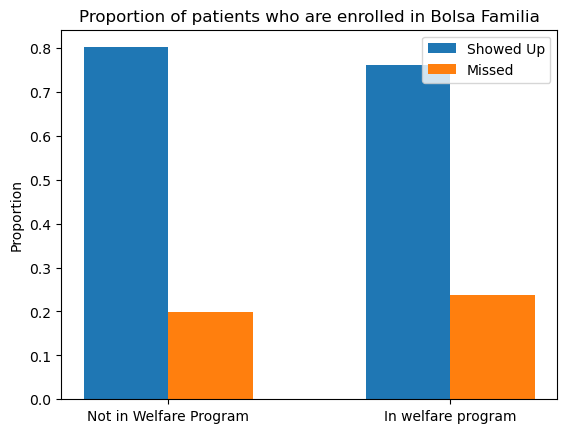

In [13]:
legends = ['Showed Up','Missed']
col = 'Scholarship'
props = [calc_props(showed,col),calc_props(missed,col)]
title = 'Proportion of patients who are enrolled in Bolsa Familia'
labels = ['Not in Welfare Program','In welfare program']
plot_props(props,legends,title,labels=labels);

Patients who are not enrolled in a welfare seem more likely to show up for the scheduled appointments. We can also see that majority of the patients are not enrolled in the welfare program and those who are enrolled are more likely not to show up.

### Research Question 2 : Which gender is more likely to show up for their appointment?

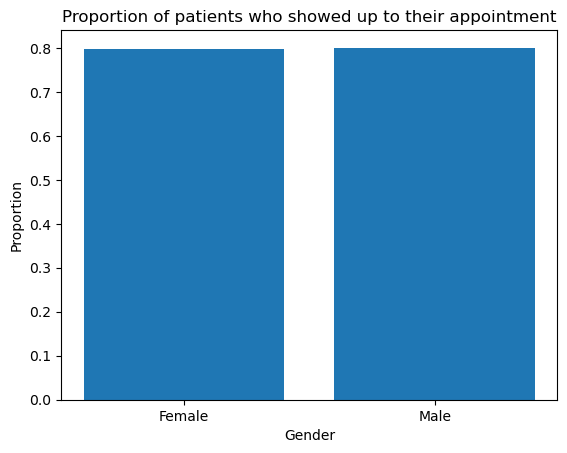

In [14]:
col = 'Gender'
props = [calc_props(showed,col)]
xlabel = 'Gender'
labels = ['Female','Male']
title = 'Proportion of patients who showed up to their appointment';
plot_props(props,legends=['Showed Up'],title=title, x_label=xlabel,labels=labels);

Female and Males have the same the proportions for those who showed up, maybe we can check and compare those who didn't show up too.

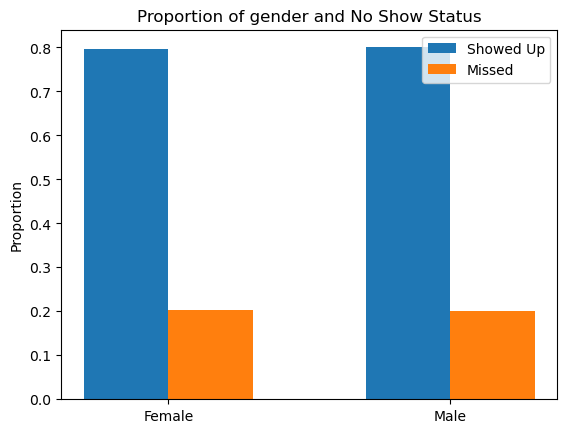

In [15]:
legends = ['Showed Up','Missed']
col = 'Gender'
props = [calc_props(showed,col),calc_props(missed,col)]
labels = ['Female','Male']
title = 'Proportion of gender and No Show Status'
plot_props(props,legends,labels=labels,title=title);

We can see gender isn't an important feature in predicting whether or not a patient would show up since both of the gender had the same proportion.

### Research Question 3: Which day of the week are people likely not to show up for their appointment?

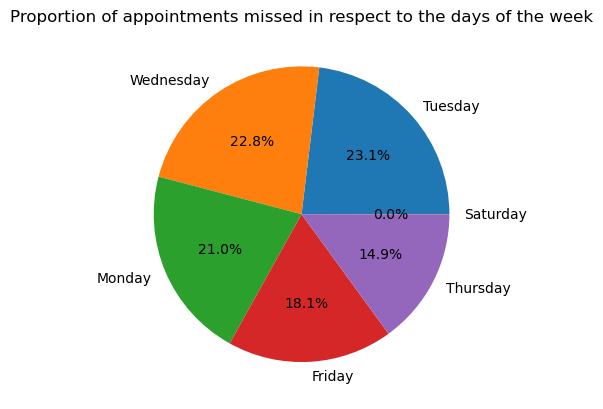

In [16]:
day_names = missed['AppointmentDay'].dt.day_name().value_counts()
labels = day_names.index
plt.pie(day_names,labels=labels, autopct='%1.1f%%')
plt.title("Proportion of appointments missed in respect to the days of the week");

Appointments that were scheduled on the Tuesday then Wednesday respectively had the most no-shows.

### Research question 4: Do patients with an underlying ailment like hypertension or diabetes more likely to show up for their scheduled appointment?

In [17]:
labels = ['Diabetes','Hypertension','Alcoholism']
showed_props = []
missed_props = []
ailments = showed.query('Diabetes == 1 or Hypertension == 1 or Alcoholism == 1')
for ailment in labels:
    showed_props.append(calc_props(showed,ailment)[1])
    missed_props.append(calc_props(missed,ailment)[1])

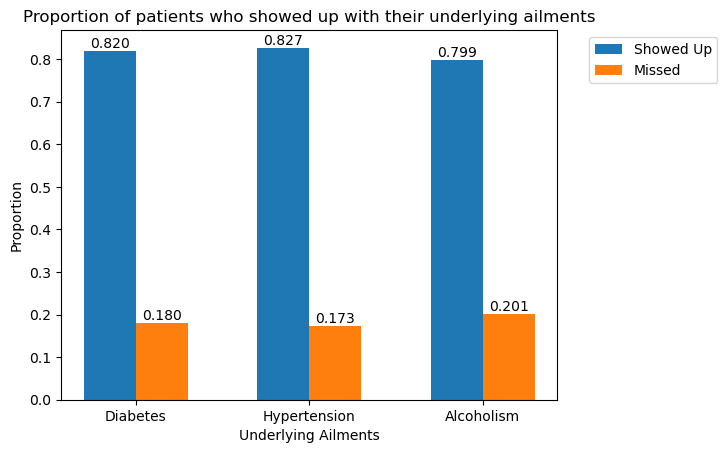

In [18]:
props = [showed_props,missed_props]
title = 'Proportion of patients who showed up with their underlying ailments'
x_label = 'Underlying Ailments'
ax1,ax2,ax = plot_props(props,legends,title=title,x_label=x_label,labels=labels)
ax.bar_label(ax1, fmt="%.3f")
ax.bar_label(ax2, fmt="%.3f")
ax.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left');

Patients who had Hypertension or diabetes showed to their scheduled appointments the most.

### Research question 5: Do patients with handicaps more likely to show up?

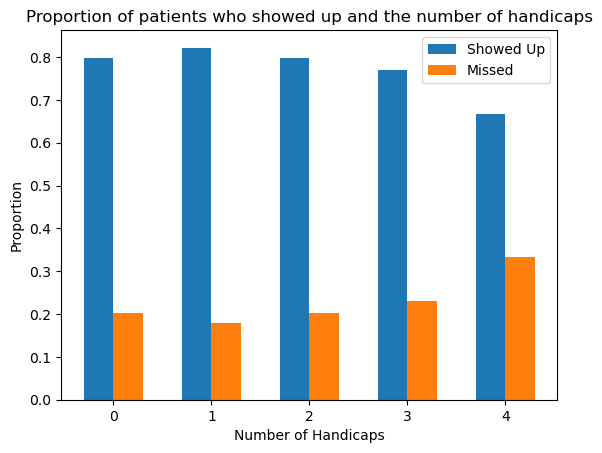

In [19]:
col = 'Handicap'
props = [calc_props(showed,col),calc_props(missed,col)]
x_label = 'Number of Handicaps'
labels = [0,1,2,3,4]
title = 'Proportion of patients who showed up and the number of handicaps'
plot_props(props,legends,labels=labels,title=title,x_label=x_label);

We can see patients with one handicap would show up the most while patients with 4 handicaps were likely to miss an appointment

### Research question 6: Did sending out an SMS have an effect on whether a patient would show up or not

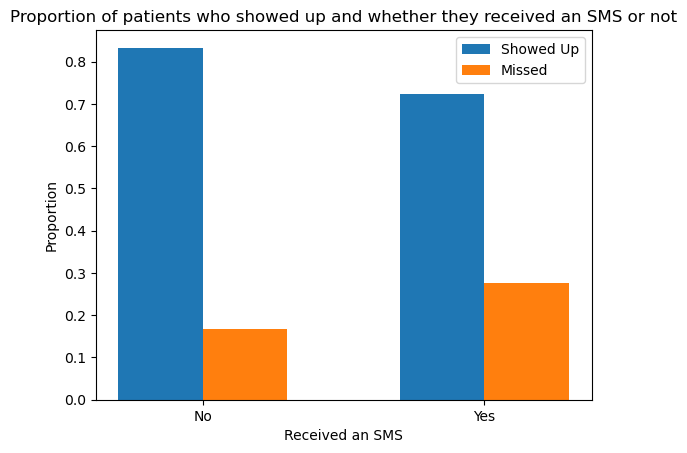

In [20]:
col = 'SMS_received'
props = [calc_props(showed,col),calc_props(missed,col)]
x_label = 'Received an SMS'
labels = ["No","Yes"]
title = 'Proportion of patients who showed up and whether they received an SMS or not'
plot_props(props,legends,x_label=x_label,title=title,labels=labels);

We can see that sending out an SMS did have an negative effect as more patients are likely not to show up to an appointment and patients were better off if they didn't receive an SMS.

<a id='conclusions'></a>
## Conclusions
According to the above findings: 
- gender isn't an important factor to predict if a patient would show up or not 
- Patients who missed their appointments were either enrolled in a welfare program or had 4 handicaps.
- Tuesday and Wednesday had the most no show ups
- Patients who had Hypertension or diabetes showed to their scheduled appointments the most.

The limitation of the dataset is that it lacks features like more disease columns like if a patient had Alzheimers or some feature that showed a measure of how busy of a patient is, since those features could help us to know why patients would miss an appointment. 